# TP1 &ndash; Géolocalisation

Indiquez ici les noms des coéquipiers :

- $m_1$ CLARY Emilie
- $m_2$ VAN BOXEM Rémi
- ($m_3$)

Perdus que vous étiez dans vos réflexions multidimensionnelles, vous réalisez subitement que vous êtes perdus et que vous ne savez plus où vous vous trouvez à la surface du globe... Heureusement, vous aviez eu la présence d'esprit d'avoir sur vous un récepteur GPS accompagné de son manuel utilisateur `gps.pdf` ainsi que votre PC équipé de SageMath.

Évidemment, vous commencez par lire le manuel.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

















Si si, vraiment, lisez-le !

## A) Mise en bouche

Deux sphères sécantes s'intersectent en un cercle... Afin de mieux visualiser la situation, réalisez une fonction prenant en argument deux centres et deux rayons et affichant les sphères correspondantes ainsi que le cercle d'intersection.

Piste pour ce dernier : fabriquer un repère orthonormé dans le plan contenant l'intersection des sphères puis utiliser `parametric_plot3d`.

Exemple de rendu :

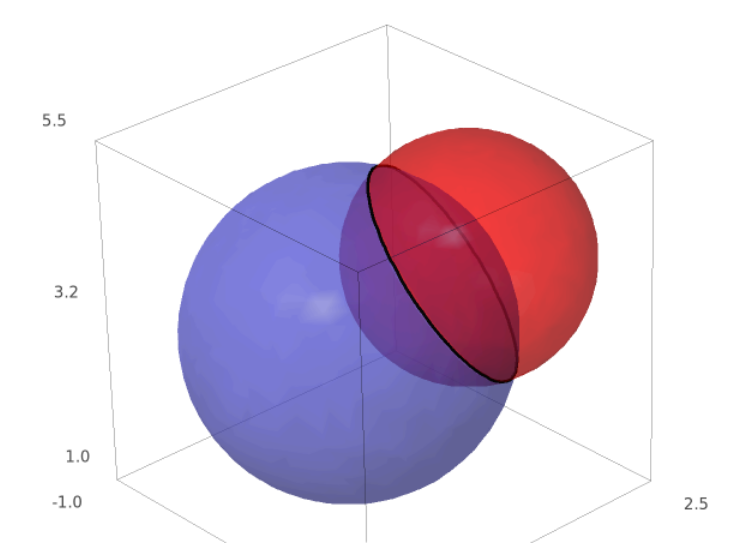

In [6]:
def intersection_circle(P1, r1, P2, r2):
    
    P1 = vector(P1)
    P2 = vector(P2)
    
    n = P2 - P1
    d = n.norm()
    l = (d^2 + r1^2 - r2^2)/(2*d^2)
    r = sqrt(r1^2 - l^2*d^2)
    
    C = P1 + l*n
    
    u = n.cross_product(vector((1.,0,0)))
    u = u/u.norm()
    v = n.cross_product(u)
    v = v/v.norm()
    
    return parametric_plot3d( C + r*u*cos(x) + r*v*sin(x), (x,0,2*pi), color="black", thickness=5 )

In [7]:
def sphere_intersection(P1,r1,P2,r2) :
    
    S1 = sphere(P1,r1,color="blue",opacity=0.5)
    S2 = sphere(P2,r2,color="red",opacity=0.5)
    
    return S1 + S2 + intersection_circle(P1,r1,P2,r2)

In [8]:
P1 = (0,0,0)
P2 = (1,-2,3)
r1 = 3
r2 = 2
sphere_intersection(P1,r1,P2,r2)

Graphics3d Object

## B) Version simplifiée

Faites maintenant un entraînement de localisation sous l'hypothèse que l'horloge de votre récepteur est parfaitement synchronisée avec celle des satellites.

1. Récupérez les éphémérides fournies par [ce simulateur de satellites](https://isen.junia.ovh/gch/cir2/gps/). Si vous rechargez la page, les satellites auront bougé, mais vous pas (les données fournies sont fictives, mais réalistes).

In [9]:
sat = [ [ 1, -4035.509812952, 15268.209592304, 17481.282953928, 1631628520.535293579, 1631628520.606197834 ],
  [ 2, 9287.589415643, 12965.032123562, 19058.688946103, 1631628519.551365614, 1631628519.617429256 ],
  [ 3, 24494.749826319, -4172.091303195, -5371.545577151, 1631628519.751160622, 1631628519.828958035 ] ]

2. Réalisez une représentation 3D permettant de visualiser la Terre, les satellites, ainsi que les cercles d'intersection de la Terre avec les sphères de rayon $d_i$ centrées sur les satellites $s_i$. Vous êtes normalement au point d'intersection de ces cercles. 

In [17]:
sat = [ [ 1, -4035.509812952, 15268.209592304, 17481.282953928, 1631628520.535293579, 1631628520.606197834 ],
  [ 2, 9287.589415643, 12965.032123562, 19058.688946103, 1631628519.551365614, 1631628519.617429256 ],
  [ 3, 24494.749826319, -4172.091303195, -5371.545577151, 1631628519.751160622, 1631628519.828958035 ] ]

c = 299792.458
d1 = (sat[0][5] - sat [0][4])*c 
d2 = (sat[1][5] - sat [1][4])*c 
d3 = (sat[2][5] - sat [2][4])*c 
c1 = (sat[0][1],sat[0][2],sat[0][3])
c2 = (sat[1][1],sat[1][2],sat[1][3])
c3 = (sat[2][1],sat[2][2],sat[2][3])
sphere((0,0,0),6371,color="yellow", opacity=0.5)+sphere(c1,d1,color="blue",opacity=0.5) + sphere(c2,d2,color="red",opacity=0.5) + sphere(c3,d3,color="green",opacity=0.5)

Graphics3d Object

## C) Version réaliste

Vous voilà fin prêt pour enfin découvrir où vous vous trouvez. Pour cela, récupérez tout d'abord les données réalistes fournies par le simulateur de satellites.

1. Résoudre numériquement le système d'équations (4) afin d'obtenir vos coordonnées $(x,y,z)$.

In [16]:
satreal = [ [ 1, 10333.214489042, 16148.870822204, 14638.732878783, 1631628521.324772596, 1631628522.390738726 ],
  [ 2, -6782.364789486, 915.951534674, 21866.222943965, 1631628520.376162767, 1631628521.443187475 ],
  [ 3, 14512.880506243, 20049.648374502, 16042.930669591, 1631628521.194952726, 1631628522.278735399 ],
  [ 4, 22663.782286053, 3646.415286863, 246.986062637, 1631628521.680268764, 1631628522.745477200 ] ]

c = 299792.458
d1 = (satreal[0][5] - satreal[0][4])*c 
d2 = (satreal[1][5] - satreal[1][4])*c 
d3 = (satreal[2][5] - satreal[2][4])*c
d4 = (satreal[3][5] - satreal[3][4])*c 
c1 = (satreal[0][1],satreal[0][2],satreal[0][3])
c2 = (satreal[1][1],satreal[1][2],satreal[1][3])
c3 = (satreal[2][1],satreal[2][2],satreal[2][3])
c4 = (satreal[3][1],satreal[3][2],satreal[3][3])
sphere(c1,d1,color="blue",opacity=0.5) + sphere(c2,d2,color="red",opacity=0.5) + sphere(c3,d3,color="green",opacity=0.5) + sphere(c4,d4,color="purple",opacity=0.5)

Graphics3d Object

2. Transformez vos coordonnées cartésiennes en coordonnées géographiques puis allez voir sur un outil comme celui-ci où vous vous trouvez. Pensez à nous envoyer une carte postale !